In [1]:
import numpy as np
import pandas as pd
import os
from sqlalchemy import create_engine



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
!pip install chart_studio

In [4]:
import chart_studio.plotly as py



In [5]:
df=pd.read_csv('C:\\Users\\mstas\\Desktop\\Project 3\\ufo_sighting_data.csv', dtype={'length_of_encounter_seconds': 'string','latitude': 'string'})
print('Global UFO Sightings /n')
print(df.columns.values)
df.head

Global UFO Sightings /n
['Date_time' 'city' 'state/province' 'country' 'UFO_shape'
 'length_of_encounter_seconds' 'described_duration_of_encounter'
 'description' 'date_documented' 'latitude' 'longitude']


<bound method NDFrame.head of               Date_time                  city state/province country  \
0      10/10/1949 20:30            san marcos             tx      us   
1      10/10/1949 21:00          lackland afb             tx     NaN   
2      10/10/1955 17:00  chester (uk/england)            NaN      gb   
3      10/10/1956 21:00                  edna             tx      us   
4      10/10/1960 20:00               kaneohe             hi      us   
...                 ...                   ...            ...     ...   
80327    9/9/2013 21:15             nashville             tn      us   
80328    9/9/2013 22:00                 boise             id      us   
80329    9/9/2013 22:00                  napa             ca      us   
80330    9/9/2013 22:20                vienna             va      us   
80331    9/9/2013 23:00                edmond             ok      us   

      UFO_shape length_of_encounter_seconds described_duration_of_encounter  \
0      cylinder           

In [6]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['length_of_encounter_seconds'] = pd.to_numeric(df['length_of_encounter_seconds'], errors="coerce")
df.dropna(axis=0, inplace=True)
#pd.options.display.float_format='{:,.2f}'.format

df

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


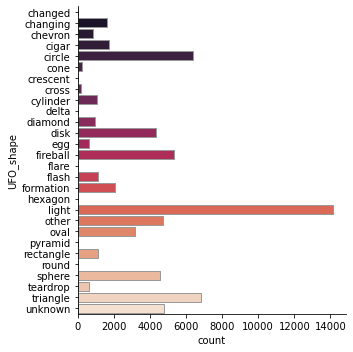

In [7]:

sns.catplot(y="UFO_shape", kind="count",
             palette="rocket",edgecolor='.6',
          data=df.sort_values("UFO_shape"))

In [8]:
df_anomaly =df[df['length_of_encounter_seconds']> 4000]
df_anomaly.count()

Date_time                          2529
city                               2529
state/province                     2529
country                            2529
UFO_shape                          2529
length_of_encounter_seconds        2529
described_duration_of_encounter    2529
description                        2529
date_documented                    2529
latitude                           2529
longitude                          2529
dtype: int64

In [9]:
df_anomaly.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
68,10/10/1997 16:00,connersville,in,us,delta,14400.0,4 hours,3 differants types &#44 cluster &#44delta &#44...,1/28/1999,39.641111,-85.141111
80,10/10/1998 22:30,st. john&#39s (canada),nf,ca,egg,7200.0,2 hours,Started off as 3 points of intense yellow ligh...,12/2/2000,47.550000,-52.666667
88,10/10/1999 21:00,rachel,nv,us,light,10800.0,3 hours,Bright lights with incredible agility seen fro...,5/24/2005,37.644722,-115.742778
122,10/10/2003 20:25,temperance,mi,us,oval,18000.0,over 5 hours,pulsating green white and red object in the no...,10/31/2003,41.779167,-83.568889
123,10/10/2003 21:10,crescent beach,sc,us,formation,37800.0,1 1/2 hr.,For two consecutive nights&#44 we watched a pa...,1/17/2004,33.807500,-78.701111


In [10]:
#ufos in the us by year

df_full=df_full.sort_values(['year'])
ufo_peryear=np.asarray(df_full[df_full.year>0].groupby('year').year.count())

ufo_peryear[-1]=ufo_peryear[-1]*3
ufo_years=np.asarray(df_full[df_full.year>0].year.unique())
trace=[go.Scatter(x=ufo_years, y=ufo_peryear, mode='lines',line=dict(color='rgb(0,163,81)',width=3)
                 )]
layout=go.Layout(title='UFO United States Only by year'),xaxis=dict(rangeslider=dict(hickness=0.05), showline=True,showgrid=False
                                                                   ),
yaxis=dict(range=[0,7000],showline=True showgrid=False)

figure=dict(data=trace,layout=layout)
iplot(figure)


SyntaxError: cannot assign to function call (Temp/ipykernel_8600/691543076.py, line 10)

In [ ]:
us_states=np.asarray(['AK','AL','AR', 'AZ','CA','CO', 'CT', 'DC','DE','FL','GA',
                     'HI', 'IA','ID','IL','IN','KS','KY','LA','MA','MD','ME',
                     'MI','MN','MO','MS','MT', 'NC','ND','NE','NH','NJ','NM',
                     'NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT',
                     'VA','VT','WA','WI', 'WV','WY'])

df_full['state/province']=df_full['state/province'].str.upper()
ufo_data=df_full[df_full['state/province'].isin(us_states)].sort_values('year')
ufo_data=ufo_data[(ufo_data.latitude>15)&(ufo_data.longitude<-65)]
ufo_data=ufo_data[(ufo_data.latitude>50)]&(ufo_data.longitude>-125)==False
ufo_data=ufo_data[ufo_data['city'].str.contains('\(Canada\)\(Mexico\)')]==False


In [ ]:
engine = create_engine("sqlite:///paranormal_activity.db")
final_df.to_sql(name="paranormal", con=engine, if_exists="append", index=False)
pd.read_sql_query("select * from paranormal", con=engine).head()